In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('results_final.csv', sep=';')

In [22]:
df.head(100)

,Unnamed: 0,loss,model,accs,thresh
0,0,0.027838,VGG11,0.1000,0.90
1,1,0.027368,VGG11,0.1000,0.91
2,2,0.023462,VGG11,0.1167,0.92
3,3,0.023612,VGG11,0.1207,0.93
4,4,0.023308,VGG11,0.1246,0.94
...,...,...,...,...,...
95,95,0.003021,VGG13,0.8969,3.00
96,96,0.035759,VGG13_S,0.0904,0.90
97,97,0.034097,VGG13_S,0.0921,0.91
98,98,0.032669,VGG13_S,0.0992,0.92


In [23]:
from matplotlib import pyplot as plt
import numpy as np

In [24]:
unprojected = df[df['thresh'] == 3.0]
unprojected.head(20)

,Unnamed: 0,loss,model,accs,thresh
15,15,0.003197,VGG11,0.8819,3.0
31,31,0.003695,VGG11_S,0.8559,3.0
47,47,0.003980,VGG11_XS,0.8322,3.0
63,63,0.005057,VGG11_XXS,0.7838,3.0
79,79,0.007575,VGG11_XXXS,0.6633,3.0
95,95,0.003021,VGG13,0.8969,3.0
111,111,0.002898,VGG13_S,0.8853,3.0
127,127,0.003674,VGG13_XS,0.8453,3.0
143,143,0.004789,VGG13_XXS,0.7918,3.0
159,159,0.007548,VGG13_XXXS,0.6600,3.0


In [25]:
all_models = unprojected['model'].values
print(all_models)
print(unprojected[unprojected['model'] == all_models[0]])
acc_dict = {
    model: unprojected[unprojected['model'] == model]['accs'].values[0] for model in all_models
}
loss_dict = {
    model: unprojected[unprojected['model'] == model]['loss'].values[0] for model in all_models
}

['VGG11' 'VGG11_S' 'VGG11_XS' 'VGG11_XXS' 'VGG11_XXXS' 'VGG13' 'VGG13_S'
 'VGG13_XS' 'VGG13_XXS' 'VGG13_XXXS' 'VGG16' 'VGG16_S' 'VGG16_XS'
 'VGG16_XXS' 'VGG16_XXXS' 'VGG19' 'VGG19_S' 'VGG19_XS' 'VGG19_XXS'
 'VGG19_XXXS']
    Unnamed: 0      loss  model    accs  thresh
15          15  0.003197  VGG11  0.8819     3.0


In [26]:
df['diff_acc'] = np.zeros(len(df))
df['diff_loss'] = np.zeros(len(df))

In [27]:
for model in all_models:
    df.loc[df['model'] == model,'diff_acc'] = df[df['model'] == model]['accs'] / acc_dict[model]
    df.loc[df['model'] == model, 'diff_loss'] = df[df['model'] == model]['loss'] / loss_dict[model] 

In [28]:
df.head(10)

,Unnamed: 0,loss,model,accs,thresh,diff_acc,diff_loss
0,0,0.027838,VGG11,0.1000,0.90,0.113392,8.706620
1,1,0.027368,VGG11,0.1000,0.91,0.113392,8.559583
2,2,0.023462,VGG11,0.1167,0.92,0.132328,7.337944
3,3,0.023612,VGG11,0.1207,0.93,0.136864,7.384702
4,4,0.023308,VGG11,0.1246,0.94,0.141286,7.289544
5,5,0.023224,VGG11,0.1315,0.95,0.149110,7.263448
6,6,0.018295,VGG11,0.1918,0.96,0.217485,5.722008
7,7,0.012358,VGG11,0.4907,0.97,0.556412,3.865158
8,8,0.005484,VGG11,0.7640,0.98,0.866311,1.715269
9,9,0.004124,VGG11,0.8337,0.99,0.945345,1.289748


In [31]:
buckets = []
means = []
for thresh in np.unique(df['thresh'].values):
    buckets.append(df.loc[df['thresh'] == thresh]['diff_acc'].values)
    means.append(np.mean(buckets[-1]))
print(np.asarray(buckets).shape)
print(buckets[0])
print(means)

(16, 20)
[0.11339154 0.11683608 0.12016342 0.12758357 0.15076134 0.11149515
 0.10211228 0.11830119 0.12376863 0.15454545 0.1458566  0.11506156
 0.19454006 0.12695189 0.14909796 0.15203815 0.15286918 0.12191321
 0.12955046 0.14920919]
[0.1338023458631649, 0.1363100163424516, 0.1419761658015886, 0.14613437496991372, 0.16021269596636373, 0.1807347486372769, 0.23431143647983266, 0.3895001358954756, 0.5938406791280141, 0.8171216281607571, 0.8647477468027113, 0.8988923511416834, 0.9476972769754195, 0.972112738217891, 0.9756318686294192, 1.0]


[0.9   0.91  0.92  0.93  0.94  0.95  0.96  0.97  0.98  0.99  0.992 0.994
 0.996 0.998 0.999 1.   ]


Text(0.5, 1.0, 'Relative Performance with Latent Space Projection')

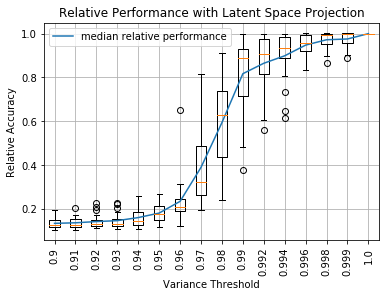

In [32]:
plt.boxplot(buckets)
plt.plot(list(range(1, len(means)+1)), means, label='median relative performance')
ticks =  np.append(np.around(np.unique(df['thresh'].values),3)[:-1], [1.0])
print(ticks)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], ticks, rotation=90)
plt.legend()
plt.ylabel('Relative Accuracy')
plt.xlabel('Variance Threshold')
plt.grid()
plt.title('Relative Performance with Latent Space Projection')

In [15]:
buckets = []
for thresh in np.unique(df['thresh'].values):
    buckets.append(df.loc[df['thresh'] == thresh]['diff_loss_rel'].values)
print(np.asarray(buckets).shape)
print(buckets[0])
plt.violinplot(buckets)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], np.around(np.unique(df['thresh'].values),3), rotation=90)


KeyError: 'diff_loss_rel'